In [2]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [3]:
my_df = pd.read_csv('BD_BCR_Prox_Size.csv')
my_df.head()

,CTUID,PRNAME,CMANAME,CMATYPE,area,SumBldgAre,BCR,BldgCount,BDensity,ProxMean,ProxSD,AvgSize
0,7050100.12,Saskatchewan,Regina,B,9.886176e+06,710689.652329,0.071887,3421,3.460400e-04,15.632272,7.689297,207.743248
1,7050100.13,Saskatchewan,Regina,B,8.509538e+06,538801.877355,0.063317,2054,2.413800e-04,16.308027,10.085216,262.318343
2,7050100.14,Saskatchewan,Regina,B,6.649859e+08,3509.555987,0.000005,13,2.000000e-08,20.151835,7.670498,269.965845
3,7050005.00,Saskatchewan,Regina,B,2.138134e+06,322800.447030,0.150973,3141,1.469040e-03,12.597635,5.610724,102.769961
4,7050006.00,Saskatchewan,Regina,B,1.273107e+07,676853.138049,0.053165,2442,1.918100e-04,18.528871,17.417214,277.171637


In [13]:
df = my_df.drop(['PRNAME','CMANAME','CMATYPE','area', 'SumBldgAre', 'BldgCount', 'ProxSD'], axis=1)
df.head()

,CTUID,BCR,BDensity,ProxMean,AvgSize
0,7050100.12,0.071887,3.460400e-04,15.632272,207.743248
1,7050100.13,0.063317,2.413800e-04,16.308027,262.318343
2,7050100.14,0.000005,2.000000e-08,20.151835,269.965845
3,7050005.00,0.150973,1.469040e-03,12.597635,102.769961
4,7050006.00,0.053165,1.918100e-04,18.528871,277.171637


# We do not need CTUID for classification

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[-1.27881335e+00, -1.17287393e+00,  3.16243491e-03,
        -7.27982861e-02],
       [-1.40935162e+00, -1.36101741e+00,  1.28270894e-01,
         7.41408187e-02],
       [-2.37374474e+00, -1.79490152e+00,  8.39908832e-01,
         9.47311099e-02],
       [-7.41501711e-02,  8.45902387e-01, -5.58666569e-01,
        -3.55430516e-01],
       [-1.56399008e+00, -1.45012760e+00,  5.39435251e-01,
         1.14132132e-01],
       [ 3.70162672e-01, -6.02097735e-01,  7.20902918e-01,
         9.88156383e-02],
       [ 1.30323958e+00,  1.22450834e+00, -9.80927404e-01,
        -2.45178603e-01],
       [ 8.40388541e-03,  2.18337994e-01, -1.80449880e-01,
        -2.56152222e-01],
       [-1.75172037e+00, -1.37369094e+00, -3.46260730e-01,
        -1.62876001e-01],
       [ 1.04979658e+00,  1.61909551e+00, -8.85253790e-01,
        -3.13489651e-01],
       [ 3.04118933e+00, -1.56210407e+00,  5.78909305e+00,
         6.75780392e+00],
       [ 8.46871088e-01,  8.27530264e-01, -8.77482219e-01,
      

In [49]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
# fit the X value to the model
k_means.fit(cluster_dataset)
labels = k_means.labels_
labels

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1], dtype=int32)

In [19]:
df['Labels'] = labels
df.head()

,CTUID,BCR,BDensity,ProxMean,AvgSize,Labels
0,7050100.12,0.071887,3.460400e-04,15.632272,207.743248,0
1,7050100.13,0.063317,2.413800e-04,16.308027,262.318343,0
2,7050100.14,0.000005,2.000000e-08,20.151835,269.965845,0
3,7050005.00,0.150973,1.469040e-03,12.597635,102.769961,1
4,7050006.00,0.053165,1.918100e-04,18.528871,277.171637,0


In [52]:
cluster0 = df[df.Labels==0]

In [53]:
cluster1 = df[df.Labels==1]

In [54]:
cluster2 = df[df.Labels==2]

In [55]:
cluster0

,CTUID,BCR,BDensity,ProxMean,AvgSize,Labels
0,7050100.12,0.071887,3.460400e-04,15.632272,207.743248,0
1,7050100.13,0.063317,2.413800e-04,16.308027,262.318343,0
2,7050100.14,0.000005,2.000000e-08,20.151835,269.965845,0
4,7050006.00,0.053165,1.918100e-04,18.528871,277.171637,0
8,7050004.00,0.040841,2.343300e-04,13.744914,174.287213,0
26,7050027.00,0.065986,2.163000e-04,19.555856,305.067447,0
37,7050022.01,0.012647,3.489000e-05,24.400279,362.488833,0
41,7050100.02,0.030670,1.695900e-04,14.096173,180.853055,0
44,7050100.05,0.080408,5.567300e-04,14.668688,144.429398,0
45,7050100.09,0.076792,3.771300e-04,15.989376,203.619519,0


In [56]:
cluster1

,CTUID,BCR,BDensity,ProxMean,AvgSize,Labels
3,7050005.00,0.150973,0.001469,12.597635,102.769961,1
5,7050007.00,0.180142,0.000664,19.509042,271.482892,1
6,7050010.00,0.241398,0.001680,10.316855,143.718956,1
7,7050003.00,0.156393,0.001120,14.640517,139.643211,1
9,7050012.00,0.224760,0.001899,10.833622,118.347344,1
11,7050014.00,0.211438,0.001459,10.875599,144.937066,1
12,7050015.00,0.174830,0.000710,16.554932,246.231107,1
13,7050016.00,0.182454,0.001499,13.396579,121.691518,1
14,7050017.00,0.182819,0.000408,20.456794,447.694841,1
15,7050018.00,0.191665,0.001776,10.677686,107.910746,1


In [57]:
cluster2

,CTUID,BCR,BDensity,ProxMean,AvgSize,Labels
10,7050013.0,0.355494,0.00013,46.884128,2744.717766,2


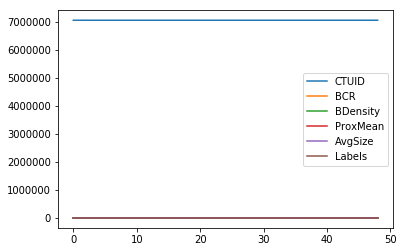

In [25]:
df.plot()

In [21]:
import geopandas as gpd

from shapely.geometry import Point


import matplotlib.pyplot as plt

% matplotlib inline

In [22]:
sasdf = gpd.read_file('BD_BCR_Prox_Size.shp')

In [26]:
sasdf['Labels'] = labels

In [30]:
sasdf['Labels'] = sasdf['Labels'].astype(object)

In [33]:
sasdf

,CTUID,PRNAME,CMANAME,CMATYPE,area,SumBldgAre,BCR,BldgCount,BDensity,ProxMean,ProxSD,AvgSize,geometry,Labels
0,7050100.12,Saskatchewan,Regina,B,9.886176e+06,7.106897e+05,0.071887,3421,3.460400e-04,15.632272,7.689297,207.743248,"POLYGON ((5313856.75143 1677717.71143, 5313403...",0
1,7050100.13,Saskatchewan,Regina,B,8.509538e+06,5.388019e+05,0.063317,2054,2.413800e-04,16.308027,10.085216,262.318343,"POLYGON ((5313190.09143 1678349.31143, 5313158...",0
2,7050100.14,Saskatchewan,Regina,B,6.649859e+08,3.509556e+03,0.000005,13,2.000000e-08,20.151835,7.670498,269.965845,"POLYGON ((5317260.705715 1691091.03143, 531730...",0
3,7050005.00,Saskatchewan,Regina,B,2.138134e+06,3.228004e+05,0.150973,3141,1.469040e-03,12.597635,5.610724,102.769961,"POLYGON ((5303740.34 1679038.68, 5303777.06285...",1
4,7050006.00,Saskatchewan,Regina,B,1.273107e+07,6.768531e+05,0.053165,2442,1.918100e-04,18.528871,17.417214,277.171637,"POLYGON ((5305754.04857 1677692.21143, 5305760...",0
5,7050007.00,Saskatchewan,Regina,B,6.932427e+05,1.248821e+05,0.180142,460,6.635500e-04,19.509042,11.674442,271.482892,"POLYGON ((5306360.654285 1677736.342855, 53062...",1
6,7050010.00,Saskatchewan,Regina,B,5.667831e+05,1.368204e+05,0.241398,952,1.679650e-03,10.316855,6.769689,143.718956,"POLYGON ((5306648.385715 1678668.01143, 530661...",1
7,7050003.00,Saskatchewan,Regina,B,2.348331e+06,3.672616e+05,0.156393,2630,1.119940e-03,14.640517,5.673725,139.643211,"POLYGON ((5303507.45143 1677493.382855, 530353...",1
8,7050004.00,Saskatchewan,Regina,B,1.731307e+07,7.070832e+05,0.040841,4057,2.343300e-04,13.744914,17.710141,174.287213,"POLYGON ((5303942.942855 1679917.33143, 530411...",0
9,7050012.00,Saskatchewan,Regina,B,1.412208e+06,3.174076e+05,0.224760,2682,1.899150e-03,10.833622,5.917523,118.347344,"POLYGON ((5305257.734285 1679986.98857, 530524...",1


In [41]:
cluster = sasdf[sasdf.Labels > 0]

In [42]:
cluster.head()

,CTUID,PRNAME,CMANAME,CMATYPE,area,SumBldgAre,BCR,BldgCount,BDensity,ProxMean,ProxSD,AvgSize,geometry,Labels
3,7050005.00,Saskatchewan,Regina,B,2.138134e+06,322800.447030,0.150973,3141,0.001469,12.597635,5.610724,102.769961,"POLYGON ((5303740.34 1679038.68, 5303777.06285...",1
5,7050007.00,Saskatchewan,Regina,B,6.932427e+05,124882.130211,0.180142,460,0.000664,19.509042,11.674442,271.482892,"POLYGON ((5306360.654285 1677736.342855, 53062...",1
6,7050010.00,Saskatchewan,Regina,B,5.667831e+05,136820.446163,0.241398,952,0.001680,10.316855,6.769689,143.718956,"POLYGON ((5306648.385715 1678668.01143, 530661...",1
7,7050003.00,Saskatchewan,Regina,B,2.348331e+06,367261.645037,0.156393,2630,0.001120,14.640517,5.673725,139.643211,"POLYGON ((5303507.45143 1677493.382855, 530353...",1
9,7050012.00,Saskatchewan,Regina,B,1.412208e+06,317407.577763,0.224760,2682,0.001899,10.833622,5.917523,118.347344,"POLYGON ((5305257.734285 1679986.98857, 530524...",1


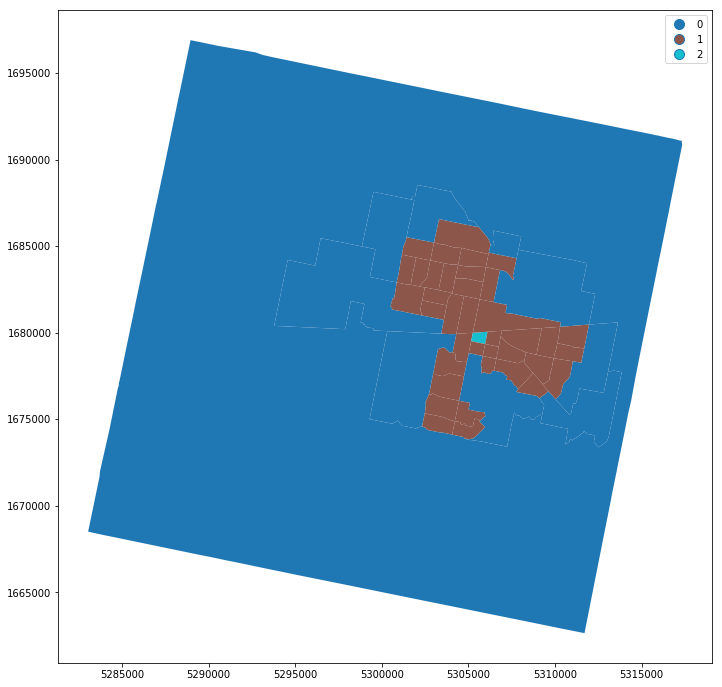

In [44]:
sasdf.plot(figsize= (12, 12), column='Labels', legend=True)

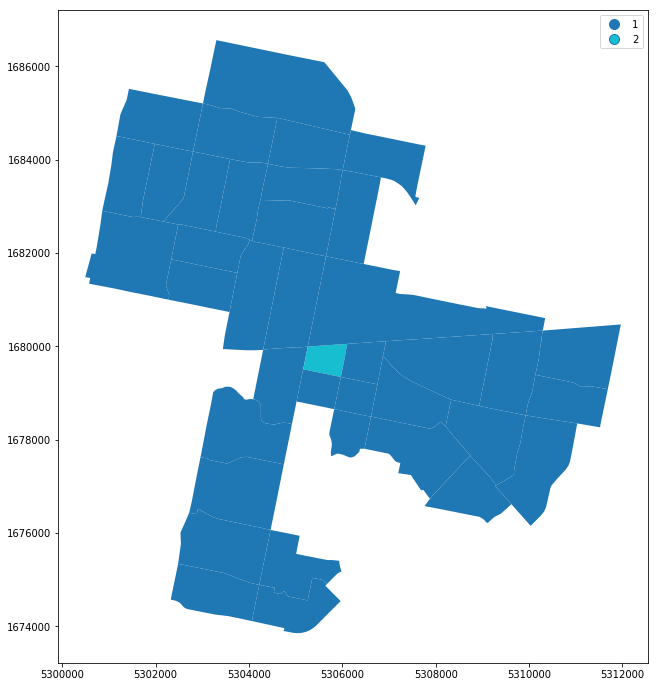

In [43]:
ax=cluster.plot(figsize= (12, 12), column='Labels', legend=True)

# plt.title('Census Tract')
# plt.show()